In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import glob
import os
from config_utility import *

import torch.nn.functional as F
import torch


In [3]:
xy_norm = lambda x: (x)/160000
z_norm = lambda x: (x-2000)/2000
p_norm = lambda x: (x)/172
t_norm = lambda x: (x)/70
k_norm = lambda x: (x)/100

times = np.cumsum(10*np.array(np.power(1.2531,np.arange(1,25,1)), dtype=int))
times = times/ 10950

META_PATH = '../../'
meta_files = glob.glob(f'{META_PATH}/ECLIPSE/meta_data/*.npy')
print('meta data:', len(meta_files))

PT_PATH = f'../dataset/dP_GLOBAL/'
if not os.path.exists(PT_PATH):
    os.mkdir(PT_PATH)

pt_files = os.listdir(PT_PATH)
print('done collected:', len(pt_files))

collect_index = []
for name in meta_files:
    name = name.split('/')[-1][:-4]
    if f'{name}_GLOBAL_DP.pt' not in pt_files:
        collect_index.append([name[:7], int(name.split('_')[2])])
print('to collect', len(collect_index))


meta data: 3009
done collected: 0
to collect 3009


In [4]:
NX, NY, NZ, NT = 100, 100, 5, 24

for tup in collect_index:
    case_path, idx = tup
    case_name = f'case_{idx}'
    meta_data = np.load(f'{META_PATH}/ECLIPSE/meta_data/{case_path}_{idx}.npy', 
                        allow_pickle=True).tolist()

    for k, v in meta_data[case_name].items():
        globals()[k]=v

    OUTPUT_DICT = return_OUTPUT_DICT(meta_data, case_name)
    
    p, t, rate = INPUT_DICT['p'], INPUT_DICT['temp'], INPUT_DICT['inj']
    INJ_MAP_DICT = return_inj_map_dict(WELL_LIST,rate,INJ_LOCATION_DICT,GRID_CENTER_DICT,LGR_LIST)

    gridx = np.repeat(xy_norm(GRID_CENTER_DICT['GLOBAL']['grid_x'])[...,None,None], 24, axis=-2)
    gridy = np.repeat(xy_norm(GRID_CENTER_DICT['GLOBAL']['grid_y'])[...,None,None], 24, axis=-2)
    gridz = np.repeat(z_norm(TOPS_DICT['GLOBAL'][0,...,None,None]), 24, axis=-2)
    gridt = (np.ones(gridz.shape)* times[None,None,None,:,None])

    inj = np.repeat(INJ_MAP_DICT['GLOBAL'][...,None,None], 24, axis=-2)
    pressure = np.repeat(p_norm(return_upsample_dict(OUTPUT_DICT, 0, 'BPR', 
                                           WELL_LIST, GRID_IDX_DICT)['GLOBAL'][...,None,None]), 
                         24, axis=-2)
    temp = t_norm(t) * np.ones(inj.shape)
    perm = np.repeat(k_norm(PERM_DICT['GLOBAL'])[0,...,None,None], 24, axis=-2)

    DICT = return_upsample_all_time(OUTPUT_DICT, 'dP', WELL_LIST, GRID_IDX_DICT, LGR_LIST)

    x_DP = np.concatenate([gridx, gridy, gridz, gridt, inj, pressure, temp, perm], 
                          axis=-1)[None,...]
    y_DP = DICT['GLOBAL'][...,None]

    x_DP = torch.from_numpy(x_DP.astype(np.float32))
    y_DP = torch.from_numpy(y_DP.astype(np.float32))

    data = {}
    data['input'] = x_DP
    data['output'] = y_DP
    
    torch.save(data, f'../dataset/dP_GLOBAL/{case_path}_{idx}_GLOBAL_DP.pt')
    print(f'{case_path}_{idx}_GLOBAL_DP done')

slope_5_44_GLOBAL_DP done
slope_1_201_GLOBAL_DP done
slope_5_367_GLOBAL_DP done
slope_7_56_GLOBAL_DP done
slope_2_144_GLOBAL_DP done
slope_1_171_GLOBAL_DP done
slope_3_19_GLOBAL_DP done
slope_6_205_GLOBAL_DP done
slope_6_62_GLOBAL_DP done
slope_4_216_GLOBAL_DP done
slope_2_2_GLOBAL_DP done
slope_7_400_GLOBAL_DP done
slope_5_489_GLOBAL_DP done
slope_5_394_GLOBAL_DP done
slope_4_19_GLOBAL_DP done
slope_6_485_GLOBAL_DP done
slope_2_171_GLOBAL_DP done
slope_6_248_GLOBAL_DP done
slope_4_321_GLOBAL_DP done
slope_7_109_GLOBAL_DP done
slope_5_414_GLOBAL_DP done
slope_5_239_GLOBAL_DP done
slope_7_492_GLOBAL_DP done
slope_5_216_GLOBAL_DP done
slope_6_77_GLOBAL_DP done
slope_2_54_GLOBAL_DP done
slope_2_64_GLOBAL_DP done
slope_4_352_GLOBAL_DP done
slope_1_185_GLOBAL_DP done
slope_4_318_GLOBAL_DP done
slope_2_396_GLOBAL_DP done
slope_1_22_GLOBAL_DP done
slope_1_417_GLOBAL_DP done
slope_2_394_GLOBAL_DP done
slope_7_482_GLOBAL_DP done
slope_1_264_GLOBAL_DP done
slope_4_333_GLOBAL_DP done
slope_7_35_G

slope_1_19_GLOBAL_DP done
slope_1_142_GLOBAL_DP done
slope_1_464_GLOBAL_DP done
slope_6_75_GLOBAL_DP done
slope_2_317_GLOBAL_DP done
slope_6_439_GLOBAL_DP done
slope_5_68_GLOBAL_DP done
slope_7_97_GLOBAL_DP done
slope_2_432_GLOBAL_DP done
slope_4_38_GLOBAL_DP done
slope_1_258_GLOBAL_DP done
slope_1_9_GLOBAL_DP done
slope_1_422_GLOBAL_DP done
slope_5_77_GLOBAL_DP done
slope_4_122_GLOBAL_DP done
slope_5_298_GLOBAL_DP done
slope_7_11_GLOBAL_DP done
slope_6_415_GLOBAL_DP done
slope_7_66_GLOBAL_DP done
slope_4_12_GLOBAL_DP done
slope_1_169_GLOBAL_DP done
slope_5_50_GLOBAL_DP done
slope_6_25_GLOBAL_DP done
slope_7_493_GLOBAL_DP done
slope_5_100_GLOBAL_DP done
slope_6_443_GLOBAL_DP done
slope_4_64_GLOBAL_DP done
slope_1_45_GLOBAL_DP done
slope_4_77_GLOBAL_DP done
slope_1_239_GLOBAL_DP done
slope_6_88_GLOBAL_DP done
slope_7_313_GLOBAL_DP done
slope_1_229_GLOBAL_DP done
slope_2_375_GLOBAL_DP done
slope_1_326_GLOBAL_DP done
slope_5_211_GLOBAL_DP done
slope_5_390_GLOBAL_DP done
slope_6_185_GLOBAL

slope_6_327_GLOBAL_DP done
slope_7_99_GLOBAL_DP done
slope_1_305_GLOBAL_DP done
slope_5_119_GLOBAL_DP done
slope_1_287_GLOBAL_DP done
slope_5_301_GLOBAL_DP done
slope_1_489_GLOBAL_DP done
slope_7_260_GLOBAL_DP done
slope_1_32_GLOBAL_DP done
slope_4_50_GLOBAL_DP done
slope_1_476_GLOBAL_DP done
slope_7_357_GLOBAL_DP done
slope_4_11_GLOBAL_DP done
slope_3_18_GLOBAL_DP done
slope_5_19_GLOBAL_DP done
slope_4_411_GLOBAL_DP done
slope_6_109_GLOBAL_DP done
slope_1_343_GLOBAL_DP done
slope_2_248_GLOBAL_DP done
slope_6_447_GLOBAL_DP done
slope_2_115_GLOBAL_DP done
slope_1_277_GLOBAL_DP done
slope_4_456_GLOBAL_DP done
slope_5_96_GLOBAL_DP done
slope_6_119_GLOBAL_DP done
slope_7_124_GLOBAL_DP done
slope_6_373_GLOBAL_DP done
slope_1_245_GLOBAL_DP done
slope_7_211_GLOBAL_DP done
slope_4_396_GLOBAL_DP done
slope_6_112_GLOBAL_DP done
slope_1_381_GLOBAL_DP done
slope_6_2_GLOBAL_DP done
slope_5_48_GLOBAL_DP done
slope_5_464_GLOBAL_DP done
slope_6_469_GLOBAL_DP done
slope_5_5_GLOBAL_DP done
slope_7_88_GL

slope_4_452_GLOBAL_DP done
slope_4_343_GLOBAL_DP done
slope_1_178_GLOBAL_DP done
slope_3_49_GLOBAL_DP done
slope_6_497_GLOBAL_DP done
slope_2_452_GLOBAL_DP done
slope_2_136_GLOBAL_DP done
slope_4_461_GLOBAL_DP done
slope_6_168_GLOBAL_DP done
slope_5_435_GLOBAL_DP done
slope_4_486_GLOBAL_DP done
slope_1_448_GLOBAL_DP done
slope_4_371_GLOBAL_DP done
slope_2_352_GLOBAL_DP done
slope_7_329_GLOBAL_DP done
slope_2_434_GLOBAL_DP done
slope_4_161_GLOBAL_DP done
slope_5_387_GLOBAL_DP done
slope_2_215_GLOBAL_DP done
slope_1_192_GLOBAL_DP done
slope_5_276_GLOBAL_DP done
slope_2_342_GLOBAL_DP done
slope_1_456_GLOBAL_DP done
slope_2_37_GLOBAL_DP done
slope_1_124_GLOBAL_DP done
slope_1_385_GLOBAL_DP done
slope_2_76_GLOBAL_DP done
slope_1_423_GLOBAL_DP done
slope_3_107_GLOBAL_DP done
slope_1_251_GLOBAL_DP done
slope_1_354_GLOBAL_DP done
slope_1_274_GLOBAL_DP done
slope_2_198_GLOBAL_DP done
slope_2_148_GLOBAL_DP done
slope_2_210_GLOBAL_DP done
slope_5_202_GLOBAL_DP done
slope_7_36_GLOBAL_DP done
slope

slope_6_229_GLOBAL_DP done
slope_5_262_GLOBAL_DP done
slope_5_255_GLOBAL_DP done
slope_2_411_GLOBAL_DP done
slope_4_294_GLOBAL_DP done
slope_7_206_GLOBAL_DP done
slope_4_51_GLOBAL_DP done
slope_4_98_GLOBAL_DP done
slope_7_347_GLOBAL_DP done
slope_4_138_GLOBAL_DP done
slope_6_295_GLOBAL_DP done
slope_5_207_GLOBAL_DP done
slope_4_300_GLOBAL_DP done
slope_2_106_GLOBAL_DP done
slope_7_406_GLOBAL_DP done
slope_7_462_GLOBAL_DP done
slope_1_445_GLOBAL_DP done
slope_1_388_GLOBAL_DP done
slope_2_277_GLOBAL_DP done
slope_6_41_GLOBAL_DP done
slope_4_67_GLOBAL_DP done
slope_1_130_GLOBAL_DP done
slope_1_280_GLOBAL_DP done
slope_1_409_GLOBAL_DP done
slope_7_41_GLOBAL_DP done
slope_1_494_GLOBAL_DP done
slope_5_124_GLOBAL_DP done
slope_1_429_GLOBAL_DP done
slope_4_179_GLOBAL_DP done
slope_5_11_GLOBAL_DP done
slope_1_29_GLOBAL_DP done
slope_5_343_GLOBAL_DP done
slope_4_357_GLOBAL_DP done
slope_4_126_GLOBAL_DP done
slope_2_200_GLOBAL_DP done
slope_5_76_GLOBAL_DP done
slope_4_215_GLOBAL_DP done
slope_1_4

slope_7_326_GLOBAL_DP done
slope_1_161_GLOBAL_DP done
slope_2_389_GLOBAL_DP done
slope_5_8_GLOBAL_DP done
slope_2_30_GLOBAL_DP done
slope_5_385_GLOBAL_DP done
slope_7_296_GLOBAL_DP done
slope_5_243_GLOBAL_DP done
slope_7_209_GLOBAL_DP done
slope_6_150_GLOBAL_DP done
slope_3_146_GLOBAL_DP done
slope_7_245_GLOBAL_DP done
slope_2_46_GLOBAL_DP done
slope_1_34_GLOBAL_DP done
slope_2_213_GLOBAL_DP done
slope_4_323_GLOBAL_DP done
slope_7_392_GLOBAL_DP done
slope_6_378_GLOBAL_DP done
slope_6_414_GLOBAL_DP done
slope_4_27_GLOBAL_DP done
slope_7_354_GLOBAL_DP done
slope_6_291_GLOBAL_DP done
slope_1_98_GLOBAL_DP done
slope_7_349_GLOBAL_DP done
slope_7_63_GLOBAL_DP done
slope_4_266_GLOBAL_DP done
slope_7_423_GLOBAL_DP done
slope_6_451_GLOBAL_DP done
slope_4_60_GLOBAL_DP done
slope_6_171_GLOBAL_DP done
slope_7_432_GLOBAL_DP done
slope_1_228_GLOBAL_DP done
slope_7_92_GLOBAL_DP done
slope_4_114_GLOBAL_DP done
slope_1_8_GLOBAL_DP done
slope_5_419_GLOBAL_DP done
slope_4_239_GLOBAL_DP done
slope_4_364_G

slope_4_39_GLOBAL_DP done
slope_1_187_GLOBAL_DP done
slope_6_113_GLOBAL_DP done
slope_6_174_GLOBAL_DP done
slope_1_298_GLOBAL_DP done
slope_7_497_GLOBAL_DP done
slope_7_133_GLOBAL_DP done
slope_4_447_GLOBAL_DP done
slope_5_484_GLOBAL_DP done
slope_6_197_GLOBAL_DP done
slope_6_194_GLOBAL_DP done
slope_6_65_GLOBAL_DP done
slope_1_308_GLOBAL_DP done
slope_4_100_GLOBAL_DP done
slope_1_342_GLOBAL_DP done
slope_7_94_GLOBAL_DP done
slope_5_60_GLOBAL_DP done
slope_6_400_GLOBAL_DP done
slope_2_264_GLOBAL_DP done
slope_1_289_GLOBAL_DP done
slope_1_175_GLOBAL_DP done
slope_2_464_GLOBAL_DP done
slope_6_431_GLOBAL_DP done
slope_7_162_GLOBAL_DP done
slope_7_420_GLOBAL_DP done
slope_4_363_GLOBAL_DP done
slope_5_396_GLOBAL_DP done
slope_5_346_GLOBAL_DP done
slope_4_123_GLOBAL_DP done
slope_1_440_GLOBAL_DP done
slope_2_393_GLOBAL_DP done
slope_6_78_GLOBAL_DP done
slope_7_380_GLOBAL_DP done
slope_2_421_GLOBAL_DP done
slope_1_75_GLOBAL_DP done
slope_3_20_GLOBAL_DP done
slope_5_106_GLOBAL_DP done
slope_6_

slope_5_492_GLOBAL_DP done
slope_3_144_GLOBAL_DP done
slope_7_438_GLOBAL_DP done
slope_7_346_GLOBAL_DP done
slope_2_270_GLOBAL_DP done
slope_1_27_GLOBAL_DP done
slope_6_401_GLOBAL_DP done
slope_2_87_GLOBAL_DP done
slope_2_134_GLOBAL_DP done
slope_1_474_GLOBAL_DP done
slope_7_110_GLOBAL_DP done
slope_4_462_GLOBAL_DP done
slope_7_155_GLOBAL_DP done
slope_2_174_GLOBAL_DP done
slope_1_458_GLOBAL_DP done
slope_1_382_GLOBAL_DP done
slope_7_236_GLOBAL_DP done
slope_7_455_GLOBAL_DP done
slope_4_28_GLOBAL_DP done
slope_1_351_GLOBAL_DP done
slope_1_225_GLOBAL_DP done
slope_1_12_GLOBAL_DP done
slope_2_358_GLOBAL_DP done
slope_1_460_GLOBAL_DP done
slope_5_160_GLOBAL_DP done
slope_2_3_GLOBAL_DP done
slope_1_314_GLOBAL_DP done
slope_6_134_GLOBAL_DP done
slope_4_58_GLOBAL_DP done
slope_7_297_GLOBAL_DP done
slope_4_434_GLOBAL_DP done
slope_1_427_GLOBAL_DP done
slope_1_227_GLOBAL_DP done
slope_7_50_GLOBAL_DP done
slope_4_390_GLOBAL_DP done
slope_6_188_GLOBAL_DP done
slope_1_321_GLOBAL_DP done
slope_4_3

slope_1_164_GLOBAL_DP done
slope_7_193_GLOBAL_DP done
slope_5_279_GLOBAL_DP done
slope_4_370_GLOBAL_DP done
slope_2_35_GLOBAL_DP done
slope_2_263_GLOBAL_DP done
slope_6_445_GLOBAL_DP done
slope_7_450_GLOBAL_DP done
slope_2_280_GLOBAL_DP done
slope_6_201_GLOBAL_DP done
slope_5_199_GLOBAL_DP done
slope_6_154_GLOBAL_DP done
slope_6_60_GLOBAL_DP done
slope_6_207_GLOBAL_DP done
slope_5_205_GLOBAL_DP done
slope_2_22_GLOBAL_DP done
slope_4_176_GLOBAL_DP done
slope_6_42_GLOBAL_DP done
slope_5_391_GLOBAL_DP done
slope_5_234_GLOBAL_DP done
slope_1_135_GLOBAL_DP done
slope_5_392_GLOBAL_DP done
slope_2_89_GLOBAL_DP done
slope_5_204_GLOBAL_DP done
slope_6_175_GLOBAL_DP done
slope_6_45_GLOBAL_DP done
slope_6_72_GLOBAL_DP done
slope_5_337_GLOBAL_DP done
slope_4_315_GLOBAL_DP done
slope_2_245_GLOBAL_DP done
slope_5_335_GLOBAL_DP done
slope_2_378_GLOBAL_DP done
slope_7_177_GLOBAL_DP done
slope_4_494_GLOBAL_DP done
slope_4_241_GLOBAL_DP done
slope_4_227_GLOBAL_DP done
slope_1_259_GLOBAL_DP done
slope_5_

slope_3_122_GLOBAL_DP done
slope_4_4_GLOBAL_DP done
slope_1_208_GLOBAL_DP done
slope_2_249_GLOBAL_DP done
slope_6_200_GLOBAL_DP done
slope_3_139_GLOBAL_DP done
slope_2_402_GLOBAL_DP done
slope_7_499_GLOBAL_DP done
slope_6_260_GLOBAL_DP done
slope_5_10_GLOBAL_DP done
slope_4_72_GLOBAL_DP done
slope_1_363_GLOBAL_DP done
slope_6_247_GLOBAL_DP done
slope_7_175_GLOBAL_DP done
slope_1_418_GLOBAL_DP done
slope_4_269_GLOBAL_DP done
slope_5_138_GLOBAL_DP done
slope_5_460_GLOBAL_DP done
slope_2_480_GLOBAL_DP done
slope_7_46_GLOBAL_DP done
slope_6_114_GLOBAL_DP done
slope_4_7_GLOBAL_DP done
slope_7_292_GLOBAL_DP done
slope_4_235_GLOBAL_DP done
slope_3_23_GLOBAL_DP done
slope_4_101_GLOBAL_DP done
slope_2_418_GLOBAL_DP done
slope_2_451_GLOBAL_DP done
slope_4_450_GLOBAL_DP done
slope_4_382_GLOBAL_DP done
slope_6_17_GLOBAL_DP done
slope_7_160_GLOBAL_DP done
slope_4_420_GLOBAL_DP done
slope_5_340_GLOBAL_DP done
slope_4_116_GLOBAL_DP done
slope_4_129_GLOBAL_DP done
slope_6_212_GLOBAL_DP done
slope_6_15

In [6]:
import json
f = open("PERF_DICT.json","r")
PERF_DICT = json.load(f)
f.close()
perf_names = list(PERF_DICT.keys())
len(perf_names)

3098

In [34]:
PERF_DICT['slope_3_6']['INJ4'] = [11, 20]

In [38]:
PERF_DICT['slope_3_6']['INJ3'] = [1, 20]

In [39]:
PERF_DICT['slope_3_6']

{'INJ1': [31, 50], 'INJ2': [1, 40], 'INJ3': [1, 20], 'INJ4': [11, 20]}

In [41]:
with open("PERF_DICT_v2.json", "w") as outfile:
    json.dump(PERF_DICT, outfile)

In [10]:
meta_data = np.load(f'../../ECLIPSE/meta_data/slope_3_6.npy', allow_pickle=True).tolist()

In [15]:
meta_data['case_6']['data'][1][].keys()

dict_keys(['TIME', 'BGSAT', 'BPR', 'FGCDM', 'LBGSAT', 'LBPR', 'FGCDI', 'FWCD', 'YEARS'])

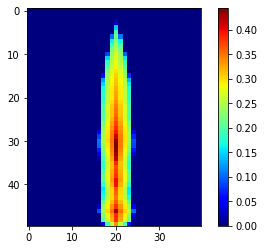

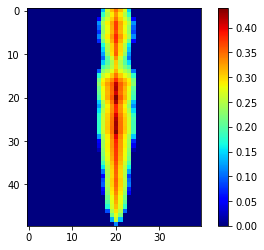

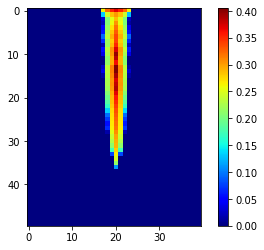

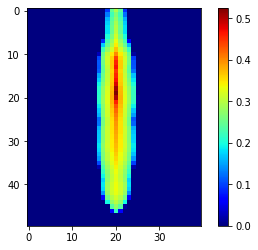

In [37]:
for k, v in meta_data['case_6'].items():
    globals()[k]=v

OUTPUT_DICT = return_OUTPUT_DICT(meta_data, 'case_6')

p, t, rate = INPUT_DICT['p'], INPUT_DICT['temp'], INPUT_DICT['inj']
INJ_MAP_DICT = return_inj_map_dict(WELL_LIST,rate,INJ_LOCATION_DICT,GRID_CENTER_DICT, LGR_LIST)

for well in ['WELL1', 'WELL2', 'WELL3', 'WELL4']:
    gridx = np.repeat(xy_norm(GRID_CENTER_DICT[well]['LGR4']['grid_x'])[...,None,None], 24, axis=-2)
    gridy = np.repeat(xy_norm(GRID_CENTER_DICT[well]['LGR4']['grid_y'])[...,None,None], 24, axis=-2)
    gridz = np.repeat(z_norm(TOPS_DICT[well]['LGR4'][0,...,None,None]), 24, axis=-2)
    gridt = (np.ones(gridz.shape)* times[None,None,None,:,None])

    inj = np.repeat(INJ_MAP_DICT[well]['LGR4'][...,None,None], 24, axis=-2)
    pressure = np.repeat(p_norm(return_upsample_dict(OUTPUT_DICT, 0, 'BPR', 
                                           WELL_LIST, GRID_IDX_DICT)[well]['LGR4'][0,...,None,None]), 24, axis=-2)
    temp = t_norm(t) * np.ones(inj.shape)
    perm = np.repeat(k_norm(PERM_DICT[well]['LGR4'])[0,...,None,None], 24, axis=-2)


    DICT = return_upsample_all_time(OUTPUT_DICT, 'BGSAT', WELL_LIST, GRID_IDX_DICT, LGR_LIST)

    coarse = DICT[well]['LGR3'][0,:,:,:,:,None]
    x_DP = np.concatenate([gridx, gridy, gridz, gridt, inj, pressure, temp, perm, coarse], axis=-1)[None,...]
    y_DP = DICT[well]['LGR4'][...,None]
    
    plt.figure()
    plt.imshow(y_DP[0,:,19,:,1,0].transpose())
    plt.jet()
    plt.colorbar()
    plt.show()